In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置

# 样例数据：

In [58]:
# x = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],
#               [1,0,0],[1,0,1],[1,1,0],[1,1,1]])
# y = np.array([0,0,0,0,1,1,1,1])

from sklearn import datasets
data=datasets.load_digits()
x=data.data
y=data.target

# 切分数据集：

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 各种模型：

In [95]:

#SVM
from sklearn.svm import SVC
model = SVC(kernel='rbf', verbose=True)  #rbf：高斯核

# #-----KNN------
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier() 

# #-----NB-------
# from sklearn.naive_bayes import MultinomialNB
# model=MultinomialNB(alpha=0.0000001)

# #----DTree-----
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()

#Logistic Regression
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()


#训练
model.fit(x_train, y_train)



[LibSVM]

SVC(verbose=True)

# 各种评价指标：

# 精确率，召回率，F1-Score：

In [65]:
labels_predict = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,labels_predict,target_names=[str(i) for i in range(10)]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# 混淆矩阵：

Text(0.5, 53.0, '预测结果')

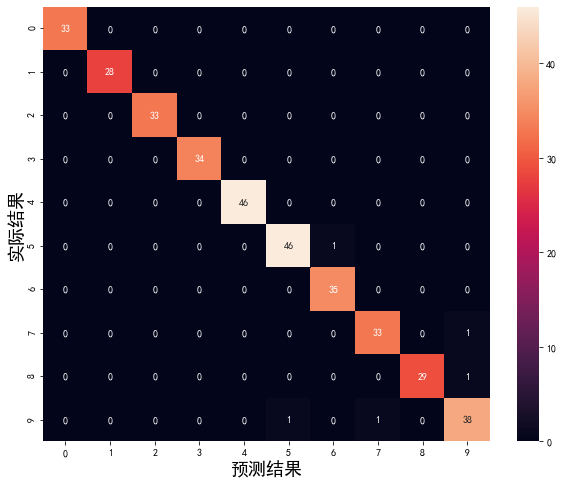

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix
conf_mat = confusion_matrix( y_test, labels_predict)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.ylabel('实际结果',fontsize=18)
plt.xlabel('预测结果',fontsize=18)

# 学习曲线：测试不同数据集划分比例对模型的影响

In [68]:

from sklearn.model_selection import learning_curve #加载学习曲线
from sklearn.model_selection import validation_curve #加载验证曲线

train_sizes=[0.1,0.2,0.4,0.6,0.7,0.8]
#获得学习曲线，针对不同的数据集
train_size,train_scores,test_scores=learning_curve(model,x,y,
                                    train_sizes=[0.1,0.2,0.4,0.6,0.7,0.8]) 
new_train_scores=train_scores.mean(1)
train_std=train_scores.std()
test_std=test_scores.std()
new_test_scores=test_scores.mean(1)

 


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

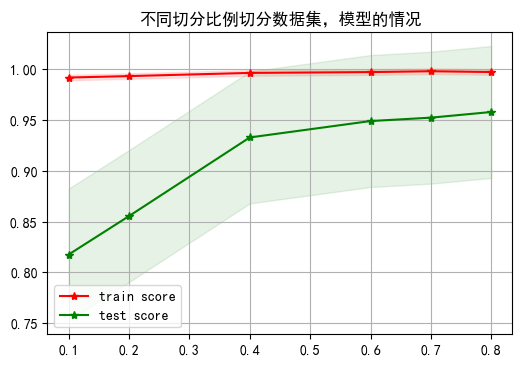

In [74]:
#画出不同比例数据集的学习曲线
plt.figure(dpi=100)
plt.grid()
plt.fill_between(train_sizes,new_train_scores-train_std,
                 new_train_scores+train_std,color='r',alpha=0.1)
plt.fill_between(train_sizes,new_test_scores-test_std,
                 new_test_scores+test_std,color='g',alpha=0.1)
 
plt.plot(train_sizes,new_train_scores,'*-',c='r',label='train score')
plt.plot(train_sizes,new_test_scores,'*-',c='g',label='test score')
plt.legend(loc='best')
plt.title('不同切分比例切分数据集，模型的情况')
plt.show()


# 验证曲线：测试模型的参数取值对模型的影响

In [82]:
'''验证模型的不同参数对模型的影响'''
print('该模型有这些参数：',model.get_params().keys())#查看有哪些系数
train_score2,validation_score2=validation_curve(model,x,y,param_name='C'
                ,param_range=np.linspace(0.1,1,20)) #改变变量C，来看得分

该模型有这些参数： dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSV

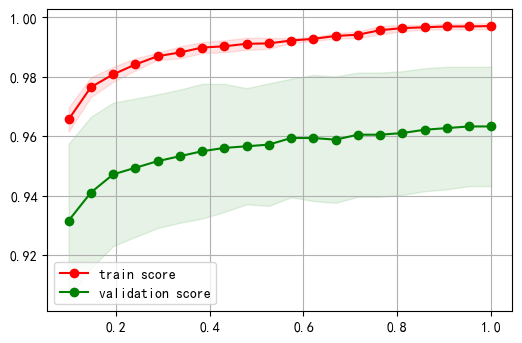

In [83]:
plt.figure(dpi=100)
x_axis=np.linspace(0.1,1,20)
train_score2_mean=train_score2.mean(1)
train_score2_std=train_score2.std(1)
validation_score2_mean=validation_score2.mean(1)
validation_score2_std=validation_score2.std(1)
 
plt.grid()
plt.fill_between(x_axis,train_score2_mean-train_score2_std,
                 train_score2_mean+train_score2_std,color='r',alpha=0.1)
plt.fill_between(x_axis,validation_score2_mean-validation_score2_std,
                 validation_score2_mean+validation_score2_std,color='g',alpha=0.1)
 
plt.plot(x_axis,train_score2_mean,'o-',c='r',label='train score')
plt.plot(x_axis,validation_score2_mean,'o-',c='g',label='validation score')
plt.legend(loc='best')

